# How Are in-Demand Skills Trending For Data Analysts
### Methodoly
- Aggregate skill count monthly
- Re-Analyze Based on Percentage of total jobs
- Plot the monthly skill Demand 

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [40]:
DF_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
DF_DA_US['job_posted_month_no'] = DF_DA_US['job_posted_date'].dt.month
DF_DA_US['job_posted_month'] = DF_DA_US['job_posted_date'].dt.month_name()

In [41]:
DF_DA_exploded = DF_DA_US.explode('job_skills')
DF_DA_pivot = (DF_DA_exploded.pivot_table(index=['job_posted_month_no','job_posted_month'],
                                          columns='job_skills',
                                          aggfunc='size',
                                          fill_value=0)).droplevel(0)
DF_DA_pivot.loc['Total'] = DF_DA_pivot.sum()
DF_DA_pivot.sort_values(by='Total',axis=1,ascending=False,inplace=True)
DF_DA_pivot.drop('Total',inplace=True)
df_da_count = DF_DA_US.groupby('job_posted_month').size()
df_da_percent = DF_DA_pivot.div(df_da_count/100,axis=0)
DF_DA_plot = df_da_percent.iloc[:,:5]

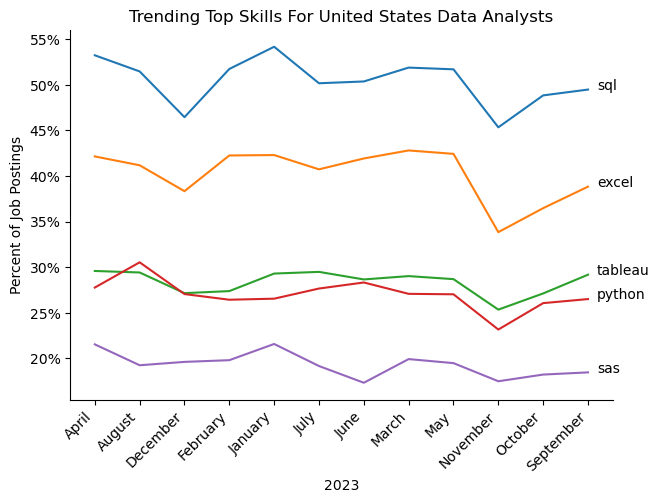

In [69]:
sns.lineplot(data=DF_DA_plot,dashes=False,legend=False)
sns.despine()
for i in range(5):
    plt.text(11.2,DF_DA_plot.iloc[-1,i],DF_DA_plot.columns[i])
fig = plt.gcf()
fig.set_figwidth(7)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f"{int(y)}%"))
plt.xticks(rotation=45,ha='right')
plt.title('Trending Top Skills For United States Data Analysts')
plt.xlabel('2023')
plt.ylabel('Percent of Job Postings')
plt.show()

In [42]:
df_da_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
April,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
August,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
December,46.443830,38.326213,27.142498,27.041970,19.602915,16.536818,17.567228,11.334506,9.901985,6.659965,...,0.000000,0.000000,0.025132,0.000000,0.000000,0.000000,0.000000,0.000000,0.025132,0.000000
February,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
January,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
July,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
June,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
March,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028


In [43]:
DF_DA_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
April,53.231939,42.139197,29.575136,27.756654,21.524219
August,51.462165,41.166717,29.409105,30.524570,19.234248
December,46.443830,38.326213,27.142498,27.041970,19.602915
February,51.730895,42.243632,27.367734,26.420640,19.790986
January,54.167648,42.288674,29.291264,26.536379,21.568166
July,50.163430,40.722938,29.475101,27.648529,19.150163
June,50.360725,41.914482,28.646841,28.312511,17.314799
March,51.881634,42.795111,29.012544,27.066581,19.909939
May,51.692369,42.419387,28.680152,27.017825,19.467254
